In [2]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

###
import sys
sys.path.insert(0,'../../src/')

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
sns.reset_orig()
matplotlib.rcParams.update({'font.size': 12})
from utils_write import stack_weights, cr_calc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def loadfile(mean, zmean, tau, temp, mixtures, model, data_size = "full",  scaling = False, model_save_dir = "", fn="", file = "res"):
    r = 30 if file == 'ures' else 50
    exp_name = "{}_m{}_zm{}_r{}_t{}_m{}_kdT{}_{}".format(model, mean, zmean, r, tau, int(mixtures), int(temp),data_size) + fn
    if (file=='res' or file == 'ures' or file == 'gmp'):
        with open(model_save_dir + '/mnist_retrain_layer_{}_{}.p'.format(file, exp_name),'rb') as f:
            file = pickle.load(f)
    if (file=='model'):
        file = torch.load(model_save_dir + '/mnist_retrain_layer_model_{}.m'.format(exp_name))
    return file

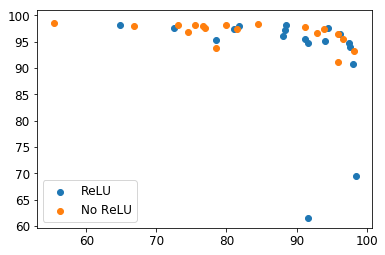

In [24]:
n_exp = pd.DataFrame(columns = ["layer", "tau", "act", "acc", "sp"])
idx=0
tau_list = [2e-6, 1e-6, 8e-7, 5e-7, 3e-7, 1e-7]
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC1", "full", model_save_dir = "./files")
    n_exp.loc[idx] = ([1, tau, "n", res["prune_test"], res["sparsity"]])
    idx+=1
    
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC1", "full", model_save_dir = "./mseha")
    n_exp.loc[idx] = ([1, tau, "a", res["prune_test"], res["sparsity"]])
    idx+=1
    
tau_list = [2e-4, 1e-4, 8e-5, 5e-5, 3e-5, 1e-5]
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC2", "full", model_save_dir = "./files")
    n_exp.loc[idx] = ([2, tau, "n", res["prune_test"], res["sparsity"]])
    idx+=1
    
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC2", "full", model_save_dir = "./mseha")
    n_exp.loc[idx] = ([2, tau, "a", res["prune_test"], res["sparsity"]])
    idx+=1
    
tau_list = [2e-2, 1e-2, 8e-3, 5e-3, 3e-3, 1e-3]
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC3", "full", model_save_dir = "./files")
    n_exp.loc[idx] = ([3, tau, "n", res["prune_test"], res["sparsity"]])
    idx+=1
    
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC3", "full", model_save_dir = "./mseha")
    n_exp.loc[idx] = ([3, tau, "a", res["prune_test"], res["sparsity"]])
    idx+=1
    
f = n_exp.query('act == \'a\'')
plt.scatter(f['sp'], f['acc'], label = "ReLU")
f= n_exp.query('act == \'n\'')
plt.scatter(f['sp'], f['acc'], label = "No ReLU")
plt.legend()

In [27]:
n_exp.query("act == \'n\' and acc > 95")

,layer,tau,act,acc,sp
1,1,1.000000e-06,n,96.63,92.906157
2,1,8.000000e-07,n,96.90,74.473036
3,1,5.000000e-07,n,97.48,76.910403
4,1,3.000000e-07,n,97.95,66.752017
5,1,1.000000e-07,n,98.49,55.428450
13,2,1.000000e-04,n,95.51,96.667774
14,2,8.000000e-05,n,96.38,95.867110
15,2,5.000000e-05,n,97.36,93.900332
16,2,3.000000e-05,n,97.81,91.156146
17,2,1.000000e-05,n,98.26,84.544850


0.0002
0.0001
8e-05
5e-05
3e-05
1e-05
0.0002
0.0001
8e-05
5e-05
3e-05
1e-05


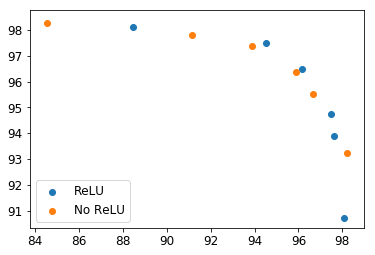

In [20]:

    
f = n_exp.query('act == \'a\'')
plt.scatter(f['sp'], f['acc'], label = "ReLU")
f= n_exp.query('act == \'n\'')
plt.scatter(f['sp'], f['acc'], label = "No ReLU")
plt.legend()

In [10]:
res['prune_test']

98.49